## Explore clustering, using the data from Jensen and Janes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy.io
from matplotlib.colors import ListedColormap
import seaborn as sns




# load the colormap 
# This can be used to setup the exact color map
array_map_file = 'arraymap.mat'
array_map = scipy.io.loadmat(array_map_file)
custom_cmap = ListedColormap(array_map['arraymap'])

data = pd.read_csv('Jensen_Janes_data_integral.csv', index_col=0)
df_data_zscored = data.apply(stats.zscore)

In [2]:
def plot_data_heatmap(data, cmap):
    # Display the zscored data with a heatmap (in the data frame), here picking a color scheme that approximates that used
    # by Jensen and Janes
    # Put the VPR data on a subplot
    plt.figure(figsize=(8, 14))
    sns.heatmap(data, annot=True, cmap=cmap, square=True)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Z-scored Data Heatmap')
    plt.show() 



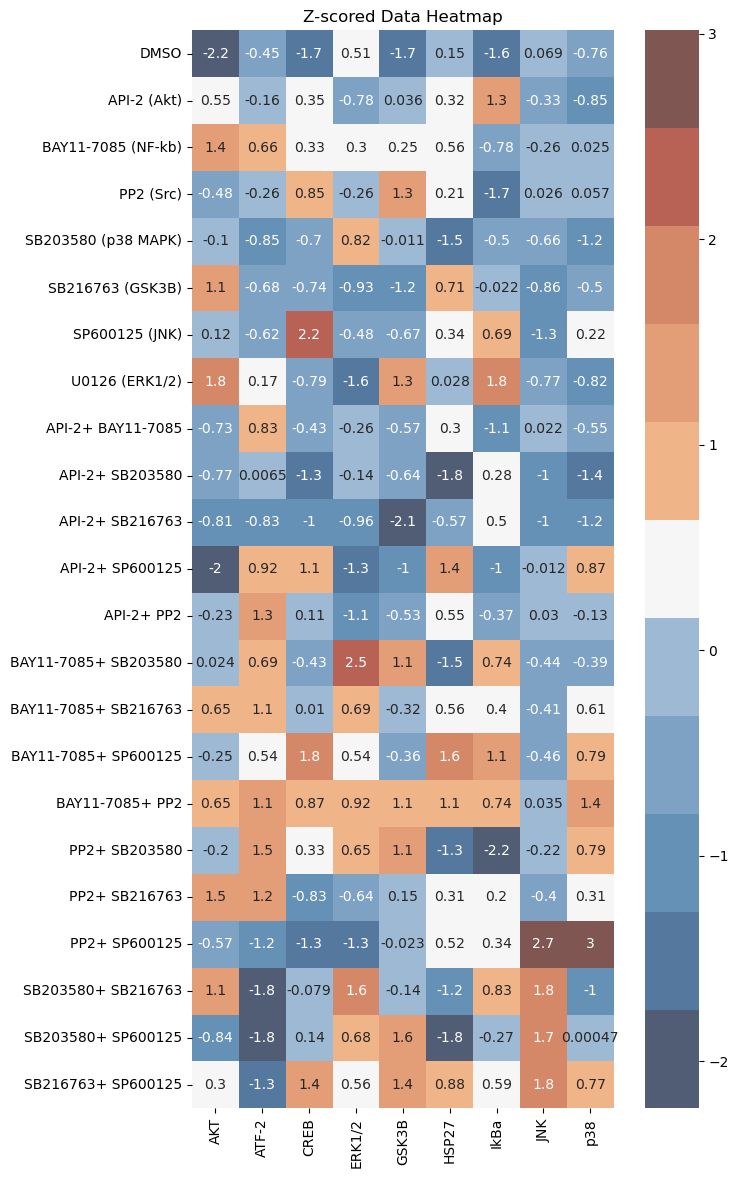

In [ ]:
# Plot the z-scored data heatmap, original data and original order

plot_data_heatmap(df_data_zscored, custom_cmap)

## Seaborn - its nice for simultaneously clustering both dimensions and putting dendrograms and cluster maps together

Text(0.5, 1.0, '                          Average Linkage, Euclidean Distance')

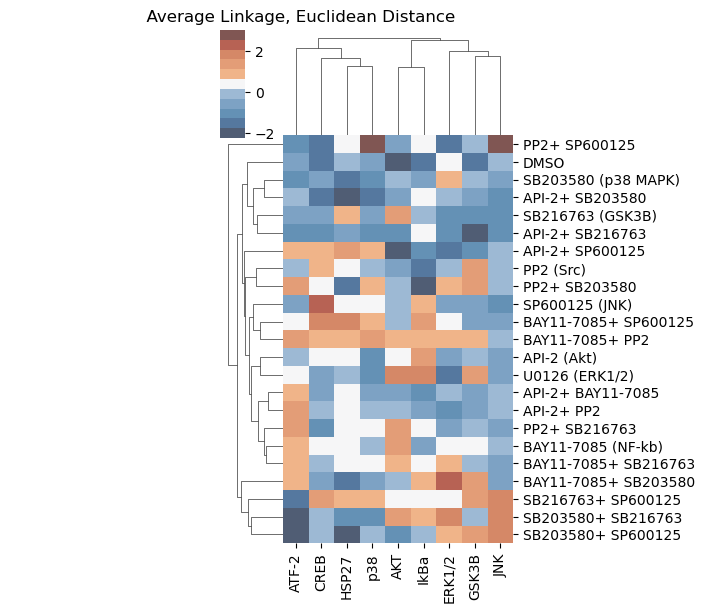

In [29]:
import seaborn as sns

# This performs two-dimensional hierarchical clustering and plots a clustered heatmap with dendrograms
sns.clustermap(df_data_zscored, cmap=custom_cmap, method='average', metric='euclidean', figsize=(5 , 6))
plt.title('                          Average Linkage, Euclidean Distance')

Text(0.5, 1.0, '          Ward Linkage, Euclidean Distance')

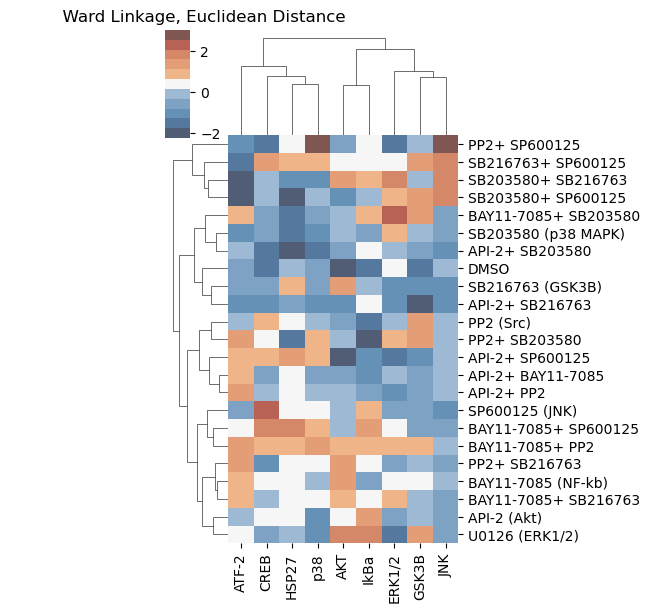

In [30]:
# We can change the linkage method. 

sns.clustermap(df_data_zscored, cmap=custom_cmap, method='ward', metric='euclidean', figsize=(5 , 6), )

plt.title('          Ward Linkage, Euclidean Distance', loc='center')

## It can be helpful to break apart the linkage and deondrogram using scipy

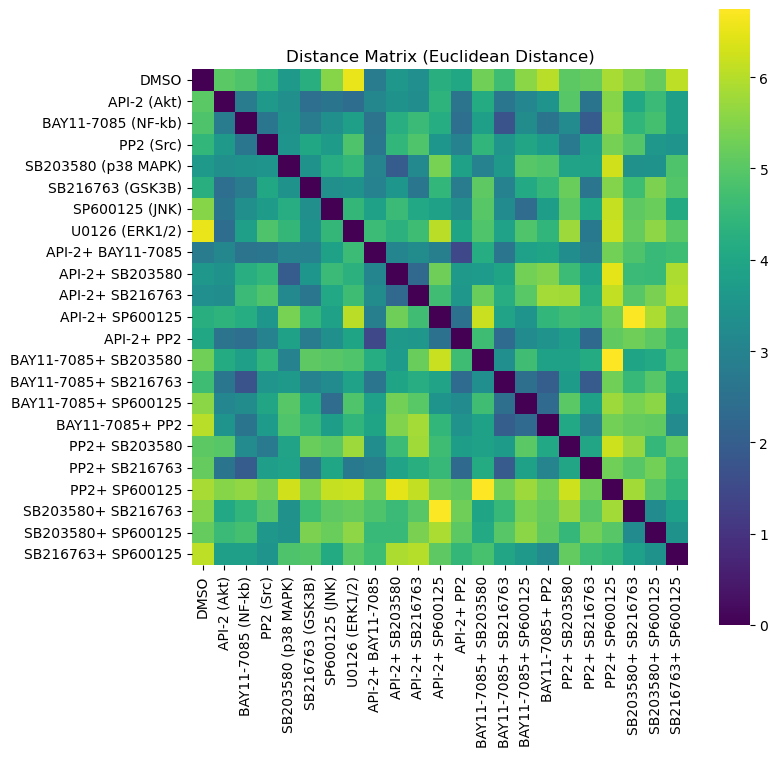

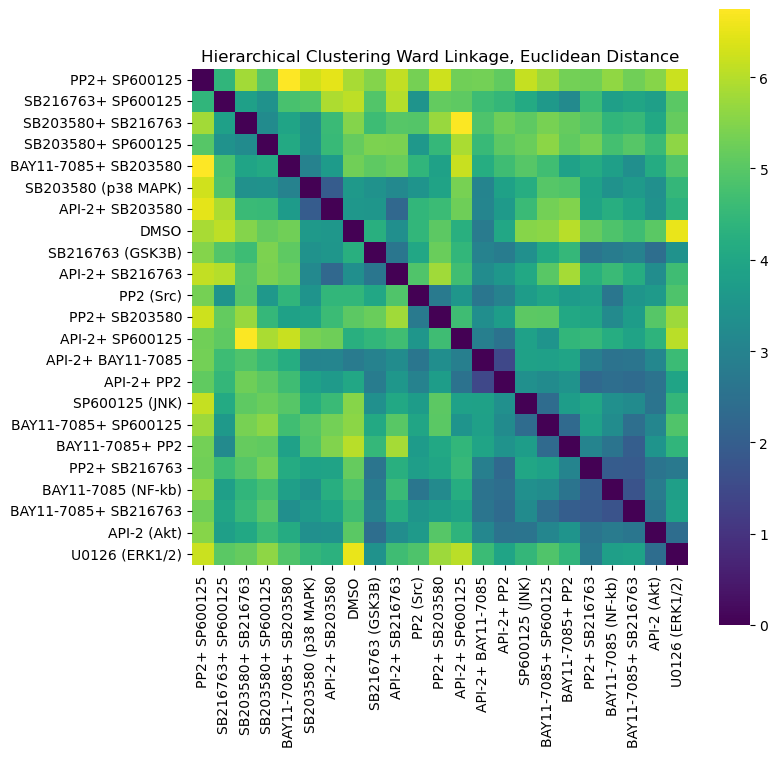

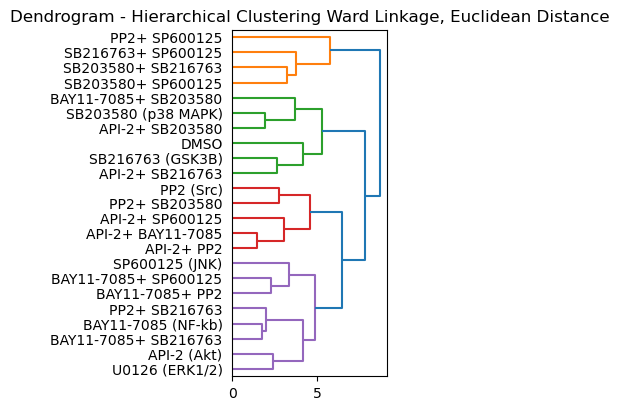

In [ ]:
# let's look at the euclidean distance matrix
from scipy.cluster.hierarchy import linkage, dendrogram 
from scipy.spatial.distance import pdist, squareform

# Perform hierarchical clustering using Ward's method. Z here is the linkage matrix, it 
# uses the data matrix of interest and the metric you define, calculaing a distance matrix that it operates on. 
Z = linkage(df_data_zscored, method='ward', metric='euclidean') 
# sorted distance matrix according to linkage based hierarchical clustering

d = dendrogram(Z, no_plot=True) # dendrogram is the drawing of the Z linkage
leaf_order = d['leaves'] # leaf order is how I learn what order to put things in, based on the linkages

# show the ordered labels
ordered_labels = df_data_zscored.index[leaf_order].tolist() # 
#print("Leaf order indices:", leaf_order)
#print("Leaf order labels:", ordered_labels)

# apply ordering to the euclidean distance matrix
distance_matrix = squareform(pdist(df_data_zscored, metric='euclidean')) # I can also get the specific distance matrix used and plot it
dist_ordered = distance_matrix[np.ix_(leaf_order, leaf_order)] # reorder the distance matrix according to the leaf order

# plot the distance matrix
plt.figure(figsize=(8, 8))
sns.heatmap(distance_matrix, cmap='viridis', xticklabels=df_data_zscored.index, yticklabels=df_data_zscored.index, square=True)
plt.xticks(rotation=90)
plt.title('Distance Matrix (Euclidean Distance)')
plt.show()


# plot the reordered distance matrix
plt.figure(figsize=(8, 8))
sns.heatmap(dist_ordered, cmap='viridis', xticklabels=ordered_labels, yticklabels=ordered_labels, square=True)
plt.xticks(rotation=90)
plt.title('Hierarchical Clustering Ward Linkage, Euclidean Distance')
plt.show()

# plot d, dendrogram on the side of the distance matrix
plt.figure(figsize=(2, 4.5))
# plot dendrogram and flip vertical axis so leaf order matches the heatmap top-to-bottom
dendrogram(Z, labels=df_data_zscored.index.tolist(), orientation='right')
plt.gca().invert_yaxis()
plt.title('Dendrogram - Hierarchical Clustering Ward Linkage, Euclidean Distance')
plt.show()

## Cluster based on the signal dimension -- what signals are most related

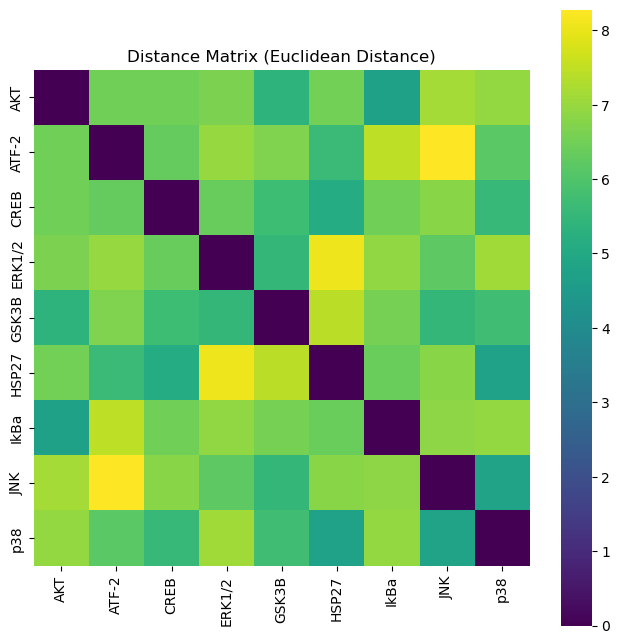

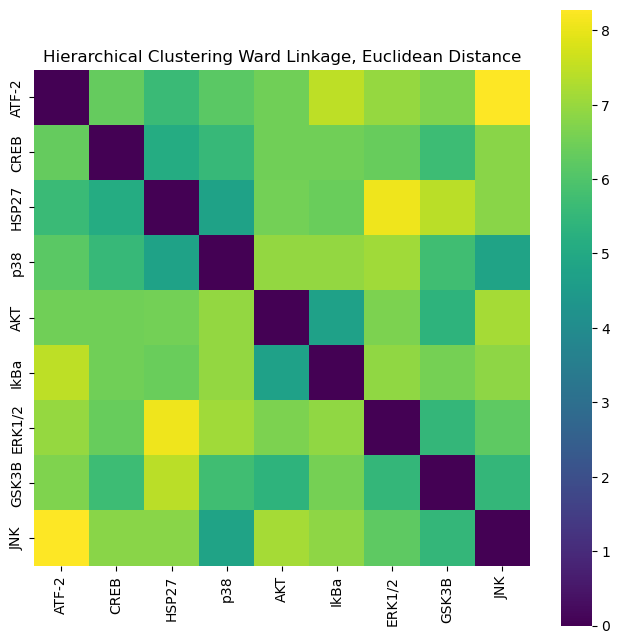

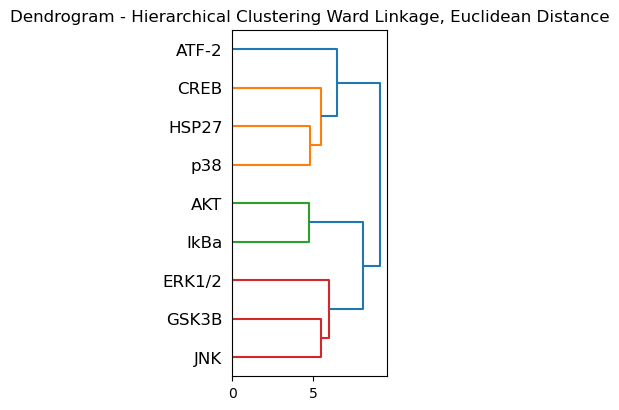

In [ ]:
# let's look at the euclidean distance matrix
from scipy.cluster.hierarchy import linkage, dendrogram 
from scipy.spatial.distance import pdist, squareform

# I can transpose the data to see how to cluster the other dimension. 
df_data_zscored_transpose = df_data_zscored.T

# Perform hierarchical clustering using Ward's method
Z = linkage(df_data_zscored_transpose, method='ward', metric='euclidean') 
# sorted distance matrix according to linkage based hierarchical clustering

d = dendrogram(Z, no_plot=True)
leaf_order = d['leaves']

# show the ordered labels
ordered_labels = df_data_zscored_transpose.index[leaf_order].tolist()
#print("Leaf order indices:", leaf_order)
#print("Leaf order labels:", ordered_labels)

# apply ordering to the euclidean distance matrix
distance_matrix = squareform(pdist(df_data_zscored_transpose, metric='euclidean'))
dist_ordered = distance_matrix[np.ix_(leaf_order, leaf_order)]

# plot the distance matrix
plt.figure(figsize=(8, 8))
sns.heatmap(distance_matrix, cmap='viridis', xticklabels=df_data_zscored_transpose.index, yticklabels=df_data_zscored_transpose.index, square=True)
plt.xticks(rotation=90)
plt.title('Distance Matrix (Euclidean Distance)')
plt.show()


# plot the reordered distance matrix
plt.figure(figsize=(8, 8))
sns.heatmap(dist_ordered, cmap='viridis', xticklabels=ordered_labels, yticklabels=ordered_labels, square=True)
plt.xticks(rotation=90)
plt.title('Hierarchical Clustering Ward Linkage, Euclidean Distance')
plt.show()

# plot d, dendrogram on the side of the distance matrix
plt.figure(figsize=(2, 4.5))
# plot dendrogram and flip vertical axis so leaf order matches the heatmap top-to-bottom
dendrogram(Z, labels=df_data_zscored_transpose.index.tolist(), orientation='right')
plt.gca().invert_yaxis()
plt.title('Dendrogram - Hierarchical Clustering Ward Linkage, Euclidean Distance')
plt.show()